## Project Objective:
The goal is to utilize machine learning models to forecast the prepayment risk associated with mortgage-backed securities.

## About Dataset

* The dataset is sourced from the official portal of Freddie Mac for home loans.
* It comprises 291,452 data points and 28 columns or parameters representing various features of the data.
* The data provides detailed information about each loan, including borrower characteristics, loan terms, property details, and loan performance indicators.

* **Below are descriptions of some features found in the dataset:**

    1. **CreditScore**: The credit score of the borrower.
    2. **FirstPaymentDate**: The date of the first payment on the mortgage.
    3. **FirstTimeHomebuyer**: A binary indicator (Y/N) indicating whether the borrower is a first-time homebuyer.
    4. **MaturityDate**: The date when the mortgage matures.
    5. **MSA (Metropolitan Statistical Area)**: A code representing the metropolitan statistical area where the property is located.
    6. **MIP (Mortgage Insurance Premium)**: The mortgage insurance premium amount.
    7. **Units**: The number of units in the property (e.g., single-family, multi-family).
    8. **Occupancy**: The occupancy status of the property (e.g., Owner-occupied, Investment property).
    9. **OCLTV (Original Combined Loan-to-Value Ratio)**: The original combined loan-to-value ratio at the time of origination.
    10. **DTI (Debt-to-Income Ratio)**: The debt-to-income ratio of the borrower.
    11. **OrigUPB (Original Unpaid Principal Balance)**: The original unpaid principal balance of the mortgage.
    12. **LTV (Loan-to-Value Ratio)**: The loan-to-value ratio of the mortgage.
    13. **OrigInterestRate**: The original interest rate of the mortgage.
    14. **Channel**: The channel through which the mortgage was originated (e.g., Retail, Broker).
    15. **PPM (Prepayment Penalty Mortgage)**: A binary indicator (Y/N) indicating whether the mortgage has a prepayment penalty.
    16. **ProductType**: The type of mortgage product (e.g., Fixed-rate Mortgage, Adjustable-rate Mortgage).
    17. **PropertyState**: The state where the property is located.
    18. **PropertyType**: The type of property (e.g., Single-family, Condo).
    19. **PostalCode**: The postal code of the property location.
    20. **LoanSeqNum**: A unique identifier for the loan sequence.
    21. **LoanPurpose**: The purpose of the loan (e.g., Purchase, Refinance).
    22. **OrigLoanTerm**: The original term of the loan in months.
    23. **NumBorrowers**: The number of borrowers on the mortgage.
    24. **SellerName**: The name of the seller of the mortgage.
    25. **ServicerName**: The name of the servicer handling the mortgage.
    26. **EverDelinquent**: A binary indicator (0/1) indicating whether the mortgage has ever been delinquent.
    27. **MonthsDelinquent**: The number of months the mortgage has been delinquent.
    28. **MonthsInRepayment**: The number of months the mortgage has been in repayment.



## **Step 1:** *Import Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

## **Step 2:** *Load Data*

In [4]:
path = r'MortgageLoanExport\LoanExport.csv'
df = pd.read_csv(path, low_memory=False)

In [5]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


## **Step 3:** *Find the number of unique value and datatypes in dataset*

In [10]:
df.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode               892
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [12]:
for name, cnt, dt in zip(df.columns, df.nunique(), df.dtypes):
    print(f"{name:<20} {cnt:<7} {dt}")

CreditScore          370     int64
FirstPaymentDate     66      int64
FirstTimeHomebuyer   3       object
MaturityDate         96      int64
MSA                  392     object
MIP                  37      int64
Units                5       int64
Occupancy            3       object
OCLTV                102     int64
DTI                  66      int64
OrigUPB              375     int64
LTV                  97      int64
OrigInterestRate     254     float64
Channel              4       object
PPM                  3       object
ProductType          1       object
PropertyState        53      object
PropertyType         7       object
PostalCode           892     object
LoanSeqNum           291451  object
LoanPurpose          3       object
OrigLoanTerm         61      int64
NumBorrowers         3       object
SellerName           20      object
ServicerName         20      object
EverDelinquent       2       int64
MonthsDelinquent     174     int64
MonthsInRepayment    212     int64


## **Step 4:** *Fix datatype*

In [13]:
def convert_to_datetime(x):
    return pd.to_datetime(str(x), format='%Y%m')

In [14]:
# fix FirstPaymentDate column datatype
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(convert_to_datetime)

In [15]:
# Fix MaturityDate columns
df['MaturityDate'] = df['MaturityDate'].apply(convert_to_datetime)

In [16]:
df.dtypes

CreditScore                    int64
FirstPaymentDate      datetime64[ns]
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
LTV                            int64
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                    object
LoanSeqNum                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
M

## **Step 5:** *Feature Engineering*

In [69]:
data = df.copy()

In [70]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [71]:
temp1 = pd.get_dummies(data['LoanPurpose'], prefix='LoanPurpose')
temp2 = pd.get_dummies(data['FirstTimeHomebuyer'], prefix='FirstTimeHomebuyer')

In [72]:
df = pd.concat([data, temp1], axis=1)
df=pd.concat([df, temp2], axis =1)

In [73]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_N,FirstTimeHomebuyer_Y
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,False,False,True,True,False
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,False,True,False,True,False
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,False,True,False,True,False
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,False,True,False,True,False
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12,False,True,False,True,False
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53,False,False,True,True,False
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38,False,True,False,True,False
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32,False,False,True,True,False


In [74]:
# Eliminating useless features
columns_to_drop = [
    'FirstTimeHomebuyer',
    'FirstTimeHomebuyer_Y',
    'FirstTimeHomebuyer_N',
    'ServicerName',
    'SellerName',
    'NumBorrowers',
    'PropertyType',
    'PropertyState',
    'ProductType',
    'PPM',
    'Channel',
    'Occupancy',
    'MSA',
    'MaturityDate',
    'FirstPaymentDate',
    'LoanPurpose',
    'PostalCode',
    'LoanSeqNum'
]

df.drop(columns_to_drop, inplace=True, axis=1)

In [75]:
df

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,False,False,True
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,False,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,False,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,False,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,0,1,60,32,90000,60,7.000,360,0,0,12,False,True,False
291447,840,0,1,73,0,267000,73,6.375,319,0,0,53,False,False,True
291448,840,0,1,73,31,87000,73,5.625,313,0,0,38,False,True,False
291449,845,0,1,80,54,88000,80,7.000,360,0,0,32,False,False,True


In [76]:
df.shape

(213434, 15)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213434 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        213434 non-null  int64  
 1   MIP                213434 non-null  int64  
 2   Units              213434 non-null  int64  
 3   OCLTV              213434 non-null  int64  
 4   DTI                213434 non-null  int64  
 5   OrigUPB            213434 non-null  int64  
 6   LTV                213434 non-null  int64  
 7   OrigInterestRate   213434 non-null  float64
 8   OrigLoanTerm       213434 non-null  int64  
 9   EverDelinquent     213434 non-null  int64  
 10  MonthsDelinquent   213434 non-null  int64  
 11  MonthsInRepayment  213434 non-null  int64  
 12  LoanPurpose_C      213434 non-null  bool   
 13  LoanPurpose_N      213434 non-null  bool   
 14  LoanPurpose_P      213434 non-null  bool   
dtypes: bool(3), float64(1), int64(11)
memory usage: 21.8 MB


In [78]:
# Convert boolean columns to numerical
df['LoanPurpose_C'] = df['LoanPurpose_C'].astype(int)
df['LoanPurpose_N'] = df['LoanPurpose_N'].astype(int)
df['LoanPurpose_P'] = df['LoanPurpose_P'].astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213434 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        213434 non-null  int64  
 1   MIP                213434 non-null  int64  
 2   Units              213434 non-null  int64  
 3   OCLTV              213434 non-null  int64  
 4   DTI                213434 non-null  int64  
 5   OrigUPB            213434 non-null  int64  
 6   LTV                213434 non-null  int64  
 7   OrigInterestRate   213434 non-null  float64
 8   OrigLoanTerm       213434 non-null  int64  
 9   EverDelinquent     213434 non-null  int64  
 10  MonthsDelinquent   213434 non-null  int64  
 11  MonthsInRepayment  213434 non-null  int64  
 12  LoanPurpose_C      213434 non-null  int32  
 13  LoanPurpose_N      213434 non-null  int32  
 14  LoanPurpose_P      213434 non-null  int32  
dtypes: float64(1), int32(3), int64(11)
memory usage: 23.6 MB

In [80]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0


In [81]:
df.isnull().sum()

CreditScore          0
MIP                  0
Units                0
OCLTV                0
DTI                  0
OrigUPB              0
LTV                  0
OrigInterestRate     0
OrigLoanTerm         0
EverDelinquent       0
MonthsDelinquent     0
MonthsInRepayment    0
LoanPurpose_C        0
LoanPurpose_N        0
LoanPurpose_P        0
dtype: int64

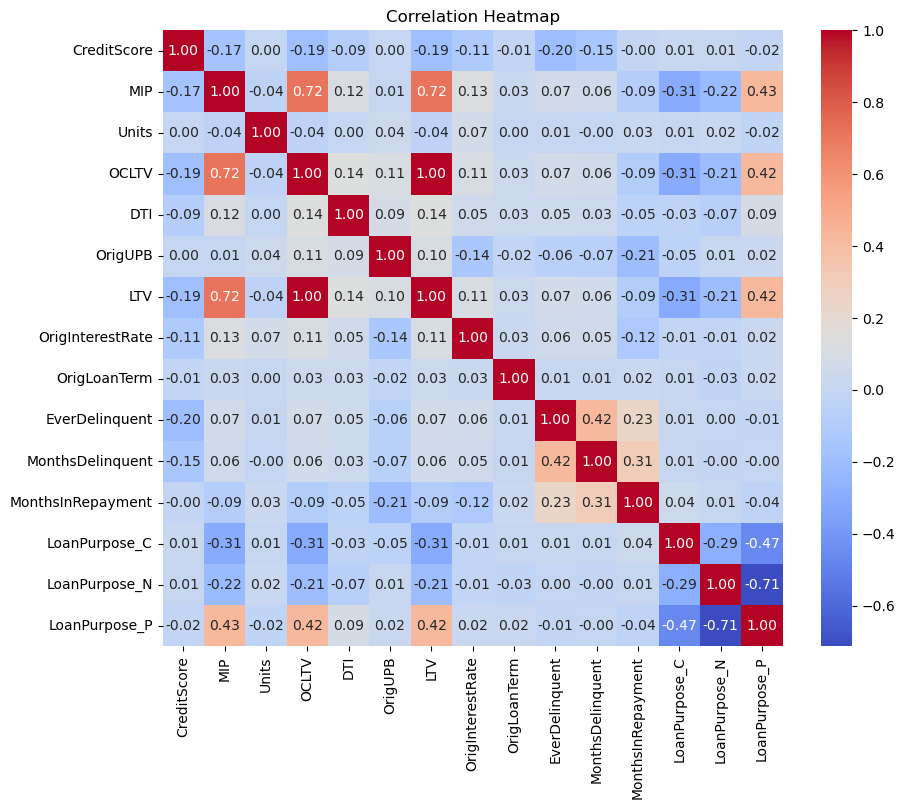

In [82]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Proform some more feature engineering

In [83]:
# Define the function to calculate credit range
def calculate_credit_range(score):
    return 'excellent' if score >= 750 else 'good' if score >= 700 else 'fair' if score >= 650 else 'poor'

# Apply the function using list comprehension within apply
df['CreditRange'] = df['CreditScore'].apply(lambda x: calculate_credit_range(x))

In [84]:
# Define the function to calculate LTV range
def calculate_ltv_range(ltv):
    return 'low' if ltv < 75 else 'medium' if 75 <= ltv < 80 else 'high' if 80 <= ltv < 90 else 'very high'

# Apply the function using list comprehension within apply
df['LTVRange'] = df['LTV'].apply(lambda x: calculate_ltv_range(x))


In [85]:
# Define the function to calculate repayment range
def calculate_repay_range(rate):
    return 'low' if rate < 4 else 'medium' if 4 <= rate < 6 else 'high'

# Apply the function using list comprehension within apply
df['RepayRange'] = df['OrigInterestRate'].apply(lambda x: calculate_repay_range(x))

In [86]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,CreditRange,LTVRange,RepayRange
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,poor,high,high
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,poor,low,high
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,poor,medium,high
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,poor,medium,high
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,poor,medium,high


#### convert categorical ranges to numerical features

In [87]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['LTVRange']= label_encoder.fit_transform(df['LTVRange'])

In [88]:
# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(df['CreditRange'], prefix='CreditRange')
repay_range_dummies = pd.get_dummies(df['RepayRange'], prefix='RepayRange')

In [89]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,CreditRange,LTVRange,RepayRange
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,poor,0,high
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,poor,1,high
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,poor,2,high
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,poor,2,high
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,poor,2,high


In [90]:
# concatenate the newly created numerical features to the original data
df = pd.concat([df, credit_range_dummies, repay_range_dummies], axis=1)

In [91]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,CreditRange,LTVRange,RepayRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,poor,0,high,False,False,False,True,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,poor,1,high,False,False,False,True,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,poor,2,high,False,False,False,True,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,poor,2,high,False,False,False,True,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,poor,2,high,False,False,False,True,True,False


In [92]:
# drop the original categorical ranges
df = df.drop(['CreditRange', 'RepayRange'], axis=1)

In [93]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0,False,False,False,True,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,1,False,False,False,True,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,2,False,False,False,True,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,2,False,False,False,True,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,2,False,False,False,True,True,False


In [94]:
# Convert boolean columns to numerical
df['CreditRange_excellent'] = df['CreditRange_excellent'].astype(int)
df['CreditRange_fair'] = df['CreditRange_fair'].astype(int)
df['CreditRange_good'] = df['CreditRange_good'].astype(int)
df['CreditRange_poor'] = df['CreditRange_poor'].astype(int)
df['RepayRange_high'] = df['RepayRange_high'].astype(int)
df['RepayRange_medium'] = df['RepayRange_medium'].astype(int)

In [95]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0,0,0,0,1,1,0
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,2,0,0,0,1,1,0


In [96]:
df.shape

(213434, 22)

## **Step 6:** *Check and Handle Outliers*

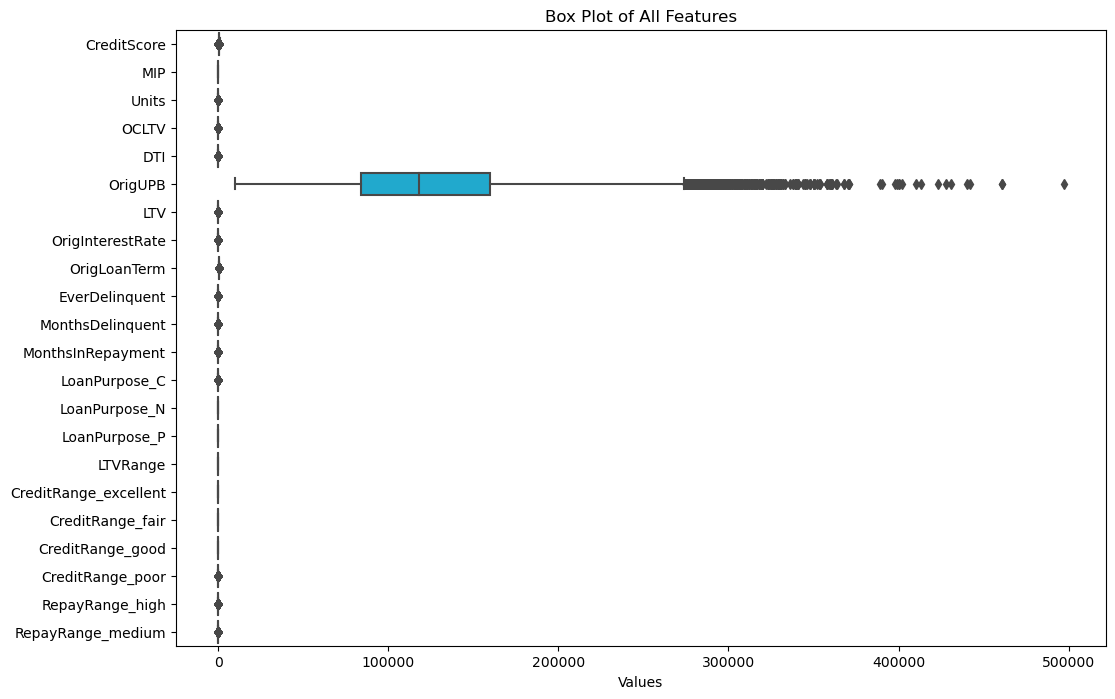

In [97]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.title('Box Plot of All Features')
plt.xlabel('Values')
plt.show()

In [98]:
df.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'LTVRange', 'CreditRange_excellent',
       'CreditRange_fair', 'CreditRange_good', 'CreditRange_poor',
       'RepayRange_high', 'RepayRange_medium'],
      dtype='object')

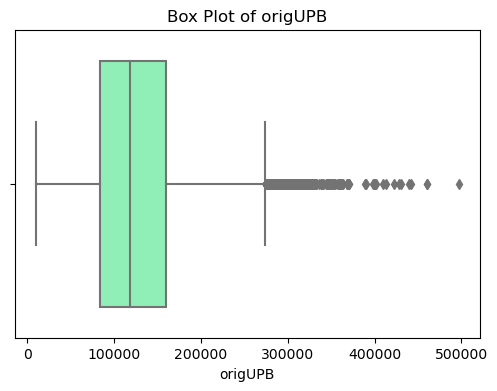

In [99]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigUPB'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

In [100]:
sorted(df.OrigUPB)
Q1, Q3=df.OrigUPB.quantile([0.25, 0.75])
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df['OrigUPB']=np.where(data['OrigUPB']>upper, upper,data['OrigUPB'])
df['OrigUPB']=np.where(data['OrigUPB']<lower, lower,data['OrigUPB'])

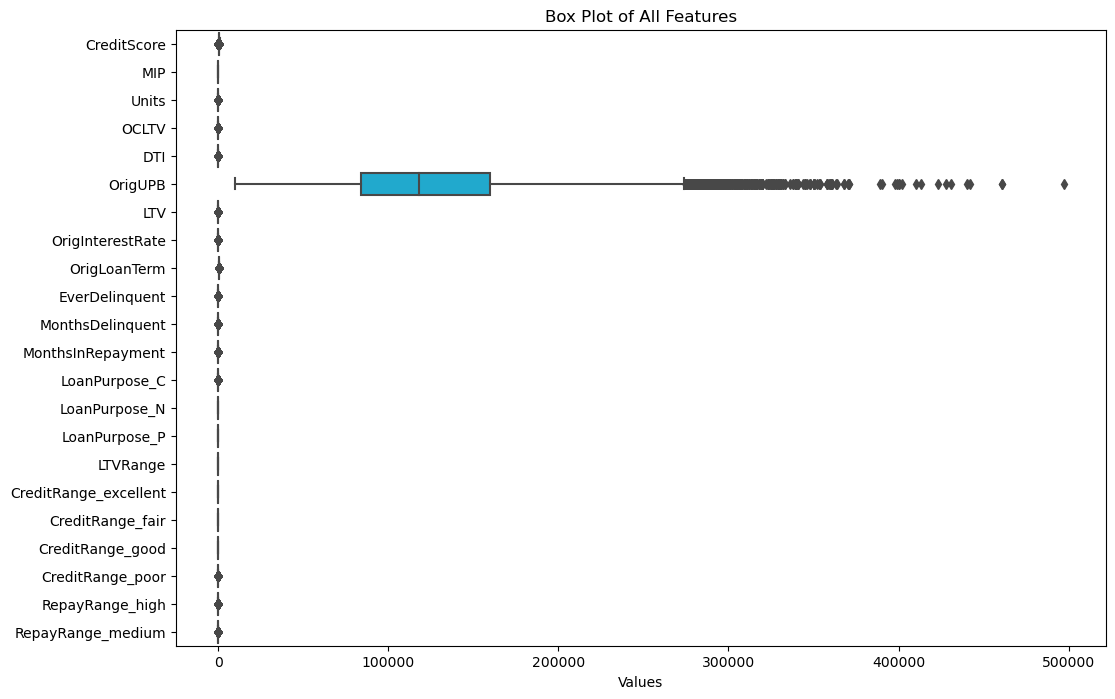

In [101]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.title('Box Plot of All Features')
plt.xlabel('Values')
plt.show()

In [102]:
df['OrigUPB']

0         117000.0
1         109000.0
2          88000.0
3         160000.0
4         109000.0
            ...   
291446     90000.0
291447    267000.0
291448     87000.0
291449     88000.0
291450     70000.0
Name: OrigUPB, Length: 213434, dtype: float64

In [103]:
df.OrigInterestRate

0         6.750
1         6.500
2         6.875
3         6.875
4         7.125
          ...  
291446    7.000
291447    6.375
291448    5.625
291449    7.000
291450    7.000
Name: OrigInterestRate, Length: 213434, dtype: float64

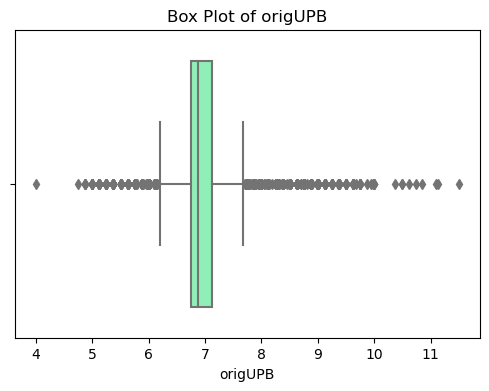

In [104]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigInterestRate'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

In [105]:
sorted(df.OrigInterestRate)
Q1, Q3=df.OrigInterestRate.quantile([0.25, 0.75])
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df['OrigInterestRate']=np.where(data['OrigInterestRate']>upper, upper,data['OrigInterestRate'])
df['OrigInterestRate']=np.where(data['OrigInterestRate']<lower, lower,data['OrigInterestRate'])

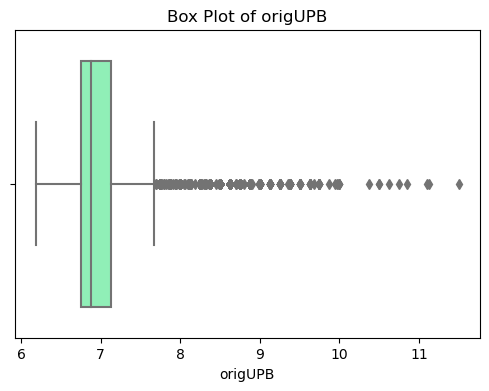

In [106]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigInterestRate'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

## **Step 7:** *Check Duplicated Row and drop them*

In [107]:
df[df.duplicated()]

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
12367,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,2,0,0,0,1,1,0
12368,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,2,0,0,0,1,1,0
12369,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,2,0,0,0,1,1,0
16061,624,0,1,47,39,34000.0,47,7.625,360,0,0,45,0,1,0,1,0,0,0,1,1,0
56269,663,0,2,69,35,80000.0,69,7.250,360,0,0,195,0,1,0,1,0,1,0,0,1,0
59713,666,0,1,70,4,69000.0,70,7.375,360,1,1,56,0,1,0,1,0,1,0,0,1,0
59714,666,0,1,70,4,69000.0,70,7.375,360,1,1,56,0,1,0,1,0,1,0,0,1,0
59994,666,0,1,71,3,51000.0,71,7.375,360,1,1,61,0,1,0,1,0,1,0,0,1,0
71495,674,30,1,95,39,105000.0,95,6.875,360,0,0,54,0,0,1,3,0,1,0,0,1,0
80467,680,0,1,59,43,61000.0,59,7.375,360,0,0,11,0,0,1,1,0,1,0,0,1,0


In [108]:
df=df.drop_duplicates()
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000.0,89,6.750,360,0,0,52,0,0,1,0,0,0,0,1,1,0
1,0,0,1,73,17,109000.0,73,6.500,360,0,0,144,0,1,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000.0,75,6.875,360,0,0,67,0,1,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000.0,76,6.875,360,0,0,35,0,1,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000.0,78,7.125,360,0,0,54,0,1,0,2,0,0,0,1,1,0


In [109]:
df.shape

(213398, 22)

In [110]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000.0,89,6.750,360,0,0,52,0,0,1,0,0,0,0,1,1,0
1,0,0,1,73,17,109000.0,73,6.500,360,0,0,144,0,1,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000.0,75,6.875,360,0,0,67,0,1,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000.0,76,6.875,360,0,0,35,0,1,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000.0,78,7.125,360,0,0,54,0,1,0,2,0,0,0,1,1,0


## **Step 8:** *Check Correlation and drop some columns*

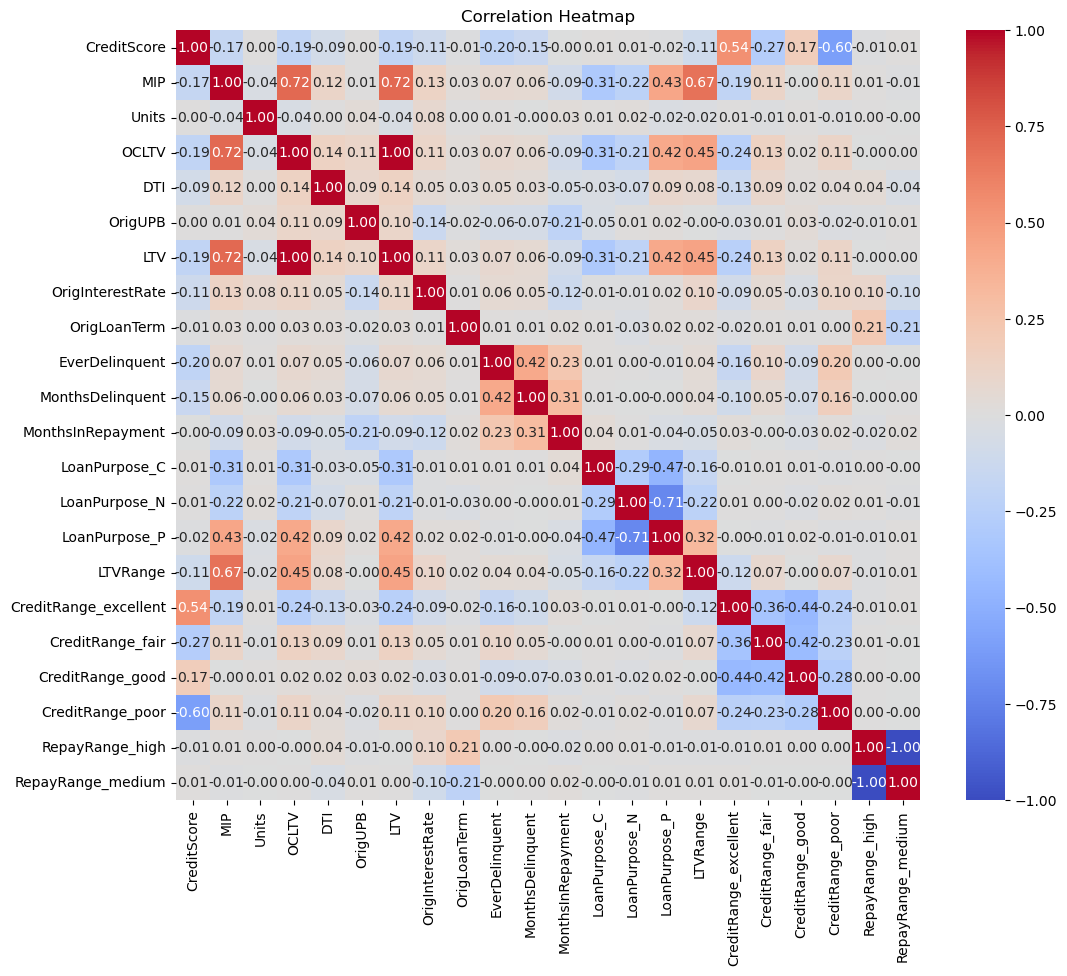

In [111]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## **Step 9:** *Drop strongly corrolated columns*

In [112]:
df.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'LTVRange', 'CreditRange_excellent',
       'CreditRange_fair', 'CreditRange_good', 'CreditRange_poor',
       'RepayRange_high', 'RepayRange_medium'],
      dtype='object')

In [113]:
drop_columns = ["CreditScore", "MIP",'LTV', "RepayRange_high", "CreditRange_poor", ]
df.drop(drop_columns,axis=1,inplace=True)

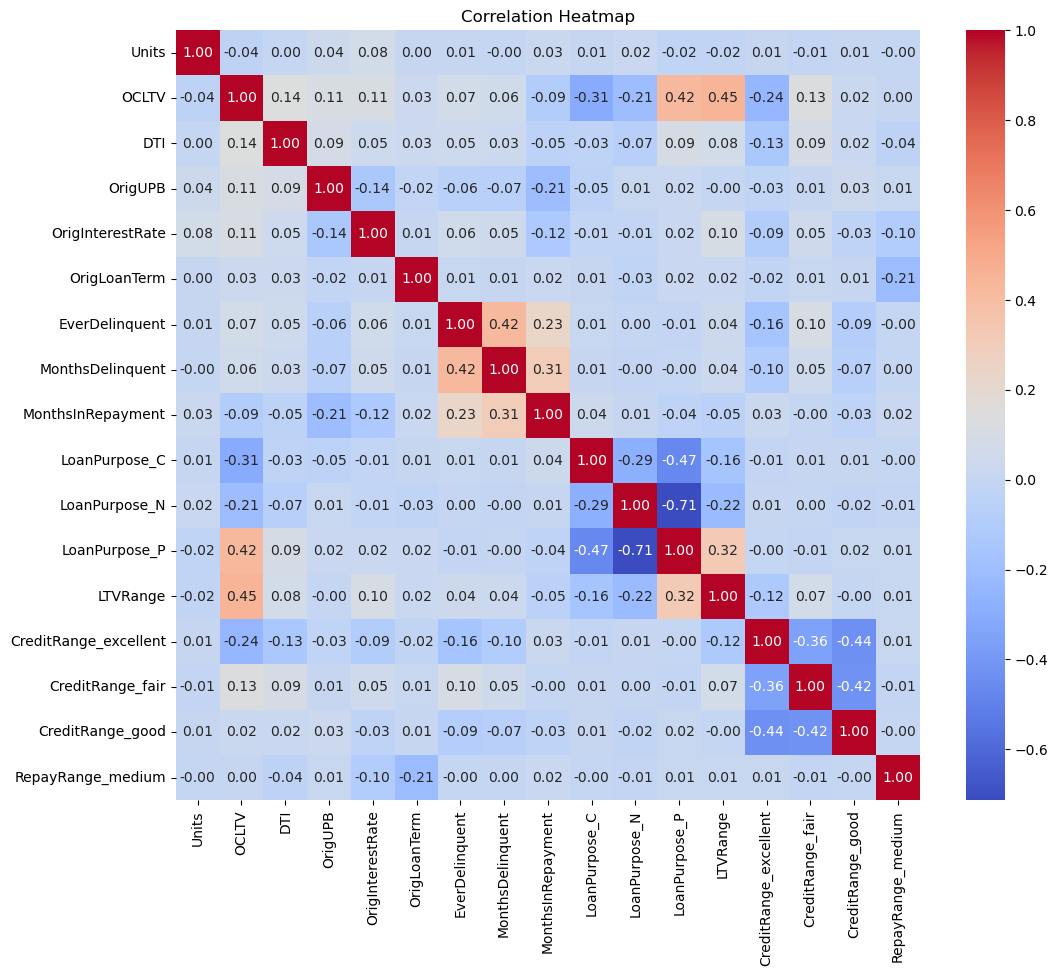

In [114]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [115]:
drop_columns = ["LoanPurpose_P"]
df.drop(drop_columns,axis=1,inplace=True)

In [116]:
df.head()

,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,RepayRange_medium
0,1,89,27,117000.0,6.750,360,0,0,52,0,0,0,0,0,0,0
1,1,73,17,109000.0,6.500,360,0,0,144,0,1,1,0,0,0,0
2,1,75,16,88000.0,6.875,360,0,0,67,0,1,2,0,0,0,0
3,1,76,14,160000.0,6.875,360,0,0,35,0,1,2,0,0,0,0
4,1,78,18,109000.0,7.125,360,0,0,54,0,1,2,0,0,0,0


In [117]:
df.EverDelinquent.unique()

array([0, 1], dtype=int64)

## **Step 10:** *Drop Null values* 

In [118]:
df.isnull().sum()

Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
RepayRange_medium        0
dtype: int64

In [119]:
# Drop rows with null values
df.dropna(inplace=True)

## **Step 14:** *Saperate Dependent variable and independent variable*

In [121]:
# Features (X)
X = df.drop(columns=['EverDelinquent'])

# Target variable (y)
y = df['EverDelinquent']

In [122]:
X.shape, y.shape

((213398, 15), (213398,))

## **Step 15:** *Scaler the Features*

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213398 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Units                  213398 non-null  int64  
 1   OCLTV                  213398 non-null  int64  
 2   DTI                    213398 non-null  int64  
 3   OrigUPB                213398 non-null  float64
 4   OrigInterestRate       213398 non-null  float64
 5   OrigLoanTerm           213398 non-null  int64  
 6   MonthsDelinquent       213398 non-null  int64  
 7   MonthsInRepayment      213398 non-null  int64  
 8   LoanPurpose_C          213398 non-null  int32  
 9   LoanPurpose_N          213398 non-null  int32  
 10  LTVRange               213398 non-null  int32  
 11  CreditRange_excellent  213398 non-null  int32  
 12  CreditRange_fair       213398 non-null  int32  
 13  CreditRange_good       213398 non-null  int32  
 14  RepayRange_medium      213398 non-null  i

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)

In [125]:
print(scaler_X.shape)

(213398, 15)


In [126]:
scaler_X

array([[-0.12319126,  0.70134271, -0.40736149, ..., -0.58402047,
        -0.71776065, -0.04586698],
       [-0.12319126, -0.33774863, -1.28619192, ..., -0.58402047,
        -0.71776065, -0.04586698],
       [-0.12319126, -0.20786221, -1.37407496, ..., -0.58402047,
        -0.71776065, -0.04586698],
       ...,
       [-0.12319126, -0.33774863, -0.05582932, ..., -0.58402047,
        -0.71776065, 21.80217469],
       [-0.12319126,  0.11685383,  1.96548067, ..., -0.58402047,
        -0.71776065, -0.04586698],
       [-0.12319126, -2.02627205, -0.2315954 , ..., -0.58402047,
        -0.71776065, -0.04586698]])